In [2]:
import pandas as pd
import numpy as np
from sympy import symbols, Eq, solve, exp
import math
from scipy.optimize import fsolve
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig

In [3]:
df = pd.read_excel("Prices.xlsx")
df = df.rename(columns={'Unnamed: 0': 'Date'}, inplace=False)
calc = df[['Date', 'CA135087J546', 'CA135087J967', 'CA135087K528', 'CA135087K940', "CA135087L518", "CA135087L930",
          "CA135087M847", "CA135087N837", "CA135087P576", "CA135087Q491", "CA135087Q988"]]
calc = calc.rename(columns={'CA135087J546': "Can_2.25_Mar_24", 'CA135087J967': "Can_1.50_Sep_24", 'CA135087K528': "Can_1.25_Mar_25", 'CA135087K940': "Can_0.50_Sep_25", "CA135087L518": "Can_0.25_Mar_26", "CA135087L930": "Can_1.00_Sep_26",
          "CA135087M847": "Can_1.25_Mar_27", "CA135087N837": "Can_2.75_Sep_27", "CA135087P576": "Can_3.50_Mar_28", "CA135087Q491": "Can_3.25_Sep_28", "CA135087Q988": "Can_4.00_Mar_29"}, inplace=False)
calc

,Date,Can_2.25_Mar_24,Can_1.50_Sep_24,Can_1.25_Mar_25,Can_0.50_Sep_25,Can_0.25_Mar_26,Can_1.00_Sep_26,Can_1.25_Mar_27,Can_2.75_Sep_27,Can_3.50_Mar_28,Can_3.25_Sep_28,Can_4.00_Mar_29
0,2024-01-08,99.630,97.960,96.460,94.340,92.862,93.46,93.282,97.580,100.500,99.74,103.406
1,2024-01-09,99.640,97.980,96.482,94.370,92.860,93.44,93.301,97.591,100.480,99.72,103.380
2,2024-01-10,99.650,97.985,96.552,94.380,92.844,93.55,93.245,97.603,100.439,99.72,103.279
3,2024-01-11,99.661,97.982,96.576,94.430,92.856,93.53,93.186,97.520,100.328,99.55,103.132
4,2024-01-12,99.670,98.021,96.661,94.490,93.023,93.60,93.467,97.740,100.637,99.88,103.542
5,2024-01-15,99.687,98.054,96.715,94.490,93.008,93.57,93.493,97.772,100.673,99.91,103.552
6,2024-01-16,99.680,97.974,96.540,94.420,92.796,93.40,93.141,97.441,100.220,99.44,102.974
7,2024-01-17,99.683,97.975,96.448,94.250,92.570,93.12,92.856,97.092,99.834,98.99,102.483
8,2024-01-18,99.708,97.999,96.495,94.240,92.546,93.08,92.753,96.956,99.662,98.81,102.279
9,2024-01-19,99.720,98.000,96.460,94.220,92.545,93.07,92.764,96.947,99.623,98.77,102.242


In [6]:
values = []
curve08 = []
for i, j in calc[calc['Date'] == "2024-01-08"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
k = 130
l = 52
m = 180
print(e)
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
print(numeric_solution[0])
print(e)


99.63
0.04831173754218129
100.4313698630137


In [7]:
#jan 8

values = []
curve08 = []
for i, j in calc[calc['Date'] == "2024-01-08"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130
#days until next coupon payment
l = 52
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve08.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve08[0] * (l/365))) / 100.75) / ((l+m)/365)
curve08.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve08[0] * (l/365)) - 0.625 * math.exp(-curve08[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve08.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve08[0] * (l/365)) - 0.25 * math.exp(-curve08[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve08[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve08.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve08[0] * (l/365)) - 0.125 * math.exp(-curve08[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve08[2] * (l+2*m)/365) - 0.125 * math.exp(-curve08[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve08.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve08[0] * (l/365)) - 0.5 * math.exp(-curve08[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve08[2] * (l+2*m)/365) - 0.5 * math.exp(-curve08[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve08[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve08.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve08[0] * (l/365)) - 0.625 * math.exp(-curve08[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve08[2] * (l+2*m)/365) - 0.625 * math.exp(-curve08[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve08[4] * (l+4*m)/365) - 0.625 * math.exp(-curve08[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve08.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve08[0] * (l/365)) - 1.375 * math.exp(-curve08[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve08[2] * (l+2*m)/365) - 1.375 * math.exp(-curve08[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve08[4] * (l+4*m)/365) - 1.375 * math.exp(-curve08[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve08[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve08.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve08[0] * (l/365)) - 1.75 * math.exp(-curve08[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve08[2] * (l+2*m)/365) - 1.75 * math.exp(-curve08[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve08[4] * (l+4*m)/365) - 1.75 * math.exp(-curve08[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve08[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve08[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve08.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve08[0] * (l/365)) - 1.625 * math.exp(-curve08[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve08[2] * (l+2*m)/365) - 1.625 * math.exp(-curve08[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve08[4] * (l+4*m)/365) - 1.625 * math.exp(-curve08[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve08[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve08[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve08[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve08.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve08[0] * (l/365)) - 2.0 * math.exp(-curve08[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve08[2] * (l+2*m)/365) - 2.0 * math.exp(-curve08[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve08[4] * (l+4*m)/365) - 2.0 * math.exp(-curve08[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve08[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve08[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve08[8] * (l+8*m)/365) - 2.0 * math.exp(-curve08[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve08.append(x)
curve08

96.90520547945205
94.51808219178082
92.9510410958904
93.81616438356164
93.72720547945205
98.55945205479452
101.74657534246575
100.89753424657533
104.83065753424658


[0.04831173754218129,
 0.0469611064228385,
 0.044019379143114275,
 0.04045597087378171,
 0.037029372415932224,
 0.035703329423833335,
 0.034800414954804376,
 0.03407451373078868,
 0.03308041865603465,
 0.03250588275177101,
 0.03209313115267877]

In [8]:
#jan 9

values = []
curve09 = []
for i, j in calc[calc['Date'] == "2024-01-09"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 1
#days until next coupon payment
l = 52 - 1
#Half a year
m = 183

e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve09.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve09[0] * (l/365))) / 100.75) / ((l+m)/365)
curve09.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve09[0] * (l/365)) - 0.625 * math.exp(-curve09[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve09.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve09[0] * (l/365)) - 0.25 * math.exp(-curve09[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve09[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve09.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve09[0] * (l/365)) - 0.125 * math.exp(-curve09[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve09[2] * (l+2*m)/365) - 0.125 * math.exp(-curve09[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve09.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve09[0] * (l/365)) - 0.5 * math.exp(-curve09[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve09[2] * (l+2*m)/365) - 0.5 * math.exp(-curve09[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve09[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve09.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve09[0] * (l/365)) - 0.625 * math.exp(-curve09[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve09[2] * (l+2*m)/365) - 0.625 * math.exp(-curve09[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve09[4] * (l+4*m)/365) - 0.625 * math.exp(-curve09[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve09.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve09[0] * (l/365)) - 1.375 * math.exp(-curve09[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve09[2] * (l+2*m)/365) - 1.375 * math.exp(-curve09[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve09[4] * (l+4*m)/365) - 1.375 * math.exp(-curve09[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve09[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve09.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve09[0] * (l/365)) - 1.75 * math.exp(-curve09[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve09[2] * (l+2*m)/365) - 1.75 * math.exp(-curve09[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve09[4] * (l+4*m)/365) - 1.75 * math.exp(-curve09[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve09[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve09[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve09.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve09[0] * (l/365)) - 1.625 * math.exp(-curve09[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve09[2] * (l+2*m)/365) - 1.625 * math.exp(-curve09[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve09[4] * (l+4*m)/365) - 1.625 * math.exp(-curve09[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve09[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve09[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve09[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve09.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve09[0] * (l/365)) - 2.0 * math.exp(-curve09[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve09[2] * (l+2*m)/365) - 2.0 * math.exp(-curve09[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve09[4] * (l+4*m)/365) - 2.0 * math.exp(-curve09[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve09[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve09[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve09[8] * (l+8*m)/365) - 2.0 * math.exp(-curve09[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve09.append(x)
curve09

96.9306301369863
94.54945205479453
92.94972602739726
93.79890410958905
93.7496301369863
98.57798630136986
101.73616438356164
100.88643835616438
104.81561643835616


[0.04810722537975101,
 0.04677902784414452,
 0.04389465246232622,
 0.040321012410029104,
 0.03708389821023544,
 0.03581358021345895,
 0.03475340726377422,
 0.03404751532469051,
 0.0331360346108499,
 0.03255646750312392,
 0.03214803794710703]

In [9]:
#jan 10

values = []
curve10 = []
for i, j in calc[calc['Date'] == "2024-01-10"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 2
#days until next coupon payment
l = 52 - 2
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve10.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve10[0] * (l/365))) / 100.75) / ((l+m)/365)
curve10.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve10[0] * (l/365)) - 0.625 * math.exp(-curve10[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve10.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve10[0] * (l/365)) - 0.25 * math.exp(-curve10[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve10[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve10.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve10[0] * (l/365)) - 0.125 * math.exp(-curve10[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve10[2] * (l+2*m)/365) - 0.125 * math.exp(-curve10[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve10.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve10[0] * (l/365)) - 0.5 * math.exp(-curve10[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve10[2] * (l+2*m)/365) - 0.5 * math.exp(-curve10[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve10[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve10.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve10[0] * (l/365)) - 0.625 * math.exp(-curve10[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve10[2] * (l+2*m)/365) - 0.625 * math.exp(-curve10[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve10[4] * (l+4*m)/365) - 0.625 * math.exp(-curve10[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve10.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve10[0] * (l/365)) - 1.375 * math.exp(-curve10[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve10[2] * (l+2*m)/365) - 1.375 * math.exp(-curve10[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve10[4] * (l+4*m)/365) - 1.375 * math.exp(-curve10[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve10[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve10.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve10[0] * (l/365)) - 1.75 * math.exp(-curve10[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve10[2] * (l+2*m)/365) - 1.75 * math.exp(-curve10[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve10[4] * (l+4*m)/365) - 1.75 * math.exp(-curve10[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve10[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve10[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve10.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve10[0] * (l/365)) - 1.625 * math.exp(-curve10[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve10[2] * (l+2*m)/365) - 1.625 * math.exp(-curve10[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve10[4] * (l+4*m)/365) - 1.625 * math.exp(-curve10[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve10[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve10[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve10[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve10.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve10[0] * (l/365)) - 2.0 * math.exp(-curve10[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve10[2] * (l+2*m)/365) - 2.0 * math.exp(-curve10[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve10[4] * (l+4*m)/365) - 2.0 * math.exp(-curve10[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve10[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve10[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve10[8] * (l+8*m)/365) - 2.0 * math.exp(-curve10[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve10.append(x)
curve10

97.00405479452056
94.56082191780821
92.93441095890411
93.91164383561643
93.69705479452055
98.5975205479452
101.70475342465753
100.89534246575343
104.72557534246575


[0.047894721774694435,
 0.04683576991165364,
 0.04332869833145061,
 0.04031607205140996,
 0.03720931894366079,
 0.03538642198676605,
 0.034973583066766234,
 0.034019651702825005,
 0.033251367408458875,
 0.03255912894679773,
 0.032373880446616175]

In [10]:
#jan 11

values = []
curve11 = []
for i, j in calc[calc['Date'] == "2024-01-11"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 3
#days until next coupon payment
l = 52 - 3
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve11.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve11[0] * (l/365))) / 100.75) / ((l+m)/365)
curve11.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve11[0] * (l/365)) - 0.625 * math.exp(-curve11[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve11.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve11[0] * (l/365)) - 0.25 * math.exp(-curve11[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve11[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve11.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve11[0] * (l/365)) - 0.125 * math.exp(-curve11[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve11[2] * (l+2*m)/365) - 0.125 * math.exp(-curve11[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve11.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve11[0] * (l/365)) - 0.5 * math.exp(-curve11[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve11[2] * (l+2*m)/365) - 0.5 * math.exp(-curve11[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve11[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve11.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve11[0] * (l/365)) - 0.625 * math.exp(-curve11[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve11[2] * (l+2*m)/365) - 0.625 * math.exp(-curve11[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve11[4] * (l+4*m)/365) - 0.625 * math.exp(-curve11[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve11.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve11[0] * (l/365)) - 1.375 * math.exp(-curve11[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve11[2] * (l+2*m)/365) - 1.375 * math.exp(-curve11[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve11[4] * (l+4*m)/365) - 1.375 * math.exp(-curve11[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve11[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve11.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve11[0] * (l/365)) - 1.75 * math.exp(-curve11[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve11[2] * (l+2*m)/365) - 1.75 * math.exp(-curve11[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve11[4] * (l+4*m)/365) - 1.75 * math.exp(-curve11[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve11[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve11[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve11.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve11[0] * (l/365)) - 1.625 * math.exp(-curve11[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve11[2] * (l+2*m)/365) - 1.625 * math.exp(-curve11[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve11[4] * (l+4*m)/365) - 1.625 * math.exp(-curve11[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve11[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve11[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve11[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve11.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve11[0] * (l/365)) - 2.0 * math.exp(-curve11[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve11[2] * (l+2*m)/365) - 2.0 * math.exp(-curve11[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve11[4] * (l+4*m)/365) - 2.0 * math.exp(-curve11[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve11[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve11[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve11[8] * (l+8*m)/365) - 2.0 * math.exp(-curve11[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve11.append(x)
curve11

97.03147945205478
94.61219178082193
92.94709589041095
93.89438356164383
93.6414794520548
98.52205479452054
101.60334246575343
100.73424657534247
104.58953424657535


[0.04759960370782767,
 0.0470218437176169,
 0.04318232951458739,
 0.040050158192952864,
 0.03719345210342425,
 0.03549679187017769,
 0.03520233552263702,
 0.03427809422330742,
 0.033547608385399184,
 0.03297004304881241,
 0.03268415107513231]

In [11]:
#jan 12

values = []
curve12 = []
for i, j in calc[calc['Date'] == "2024-01-12"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 4
#days until next coupon payment
l = 52 - 4
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve12.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve12[0] * (l/365))) / 100.75) / ((l+m)/365)
curve12.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve12[0] * (l/365)) - 0.625 * math.exp(-curve12[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve12.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve12[0] * (l/365)) - 0.25 * math.exp(-curve12[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve12[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve12.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve12[0] * (l/365)) - 0.125 * math.exp(-curve12[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve12[2] * (l+2*m)/365) - 0.125 * math.exp(-curve12[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve12.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve12[0] * (l/365)) - 0.5 * math.exp(-curve12[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve12[2] * (l+2*m)/365) - 0.5 * math.exp(-curve12[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve12[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve12.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve12[0] * (l/365)) - 0.625 * math.exp(-curve12[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve12[2] * (l+2*m)/365) - 0.625 * math.exp(-curve12[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve12[4] * (l+4*m)/365) - 0.625 * math.exp(-curve12[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve12.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve12[0] * (l/365)) - 1.375 * math.exp(-curve12[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve12[2] * (l+2*m)/365) - 1.375 * math.exp(-curve12[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve12[4] * (l+4*m)/365) - 1.375 * math.exp(-curve12[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve12[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve12.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve12[0] * (l/365)) - 1.75 * math.exp(-curve12[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve12[2] * (l+2*m)/365) - 1.75 * math.exp(-curve12[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve12[4] * (l+4*m)/365) - 1.75 * math.exp(-curve12[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve12[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve12[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve12.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve12[0] * (l/365)) - 1.625 * math.exp(-curve12[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve12[2] * (l+2*m)/365) - 1.625 * math.exp(-curve12[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve12[4] * (l+4*m)/365) - 1.625 * math.exp(-curve12[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve12[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve12[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve12[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve12.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve12[0] * (l/365)) - 2.0 * math.exp(-curve12[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve12[2] * (l+2*m)/365) - 2.0 * math.exp(-curve12[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve12[4] * (l+4*m)/365) - 2.0 * math.exp(-curve12[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve12[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve12[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve12[8] * (l+8*m)/365) - 2.0 * math.exp(-curve12[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve12.append(x)
curve12

97.11990410958904
94.67356164383561
93.1147808219178
93.96712328767123
93.92590410958904
98.74958904109589
101.92193150684932
101.0731506849315
105.01049315068494


[0.047443742122620224,
 0.04653076134140453,
 0.04247658922445859,
 0.0397200808619241,
 0.03639458699060423,
 0.03524020460040926,
 0.03423884284703689,
 0.03363680252930754,
 0.03274734590783175,
 0.03220349395608685,
 0.03182429145040949]

In [12]:
#jan 15

values = []
curve15 = []
for i, j in calc[calc['Date'] == "2024-01-15"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 7
#days until next coupon payment
l = 52 - 7
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve15.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve15[0] * (l/365))) / 100.75) / ((l+m)/365)
curve15.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve15[0] * (l/365)) - 0.625 * math.exp(-curve15[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve15.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve15[0] * (l/365)) - 0.25 * math.exp(-curve15[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve15[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve15.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve15[0] * (l/365)) - 0.125 * math.exp(-curve15[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve15[2] * (l+2*m)/365) - 0.125 * math.exp(-curve15[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve15.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve15[0] * (l/365)) - 0.5 * math.exp(-curve15[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve15[2] * (l+2*m)/365) - 0.5 * math.exp(-curve15[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve15[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve15.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve15[0] * (l/365)) - 0.625 * math.exp(-curve15[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve15[2] * (l+2*m)/365) - 0.625 * math.exp(-curve15[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve15[4] * (l+4*m)/365) - 0.625 * math.exp(-curve15[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve15.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve15[0] * (l/365)) - 1.375 * math.exp(-curve15[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve15[2] * (l+2*m)/365) - 1.375 * math.exp(-curve15[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve15[4] * (l+4*m)/365) - 1.375 * math.exp(-curve15[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve15[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve15.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve15[0] * (l/365)) - 1.75 * math.exp(-curve15[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve15[2] * (l+2*m)/365) - 1.75 * math.exp(-curve15[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve15[4] * (l+4*m)/365) - 1.75 * math.exp(-curve15[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve15[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve15[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve15.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve15[0] * (l/365)) - 1.625 * math.exp(-curve15[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve15[2] * (l+2*m)/365) - 1.625 * math.exp(-curve15[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve15[4] * (l+4*m)/365) - 1.625 * math.exp(-curve15[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve15[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve15[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve15[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve15.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve15[0] * (l/365)) - 2.0 * math.exp(-curve15[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve15[2] * (l+2*m)/365) - 2.0 * math.exp(-curve15[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve15[4] * (l+4*m)/365) - 2.0 * math.exp(-curve15[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve15[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve15[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve15[8] * (l+8*m)/365) - 2.0 * math.exp(-curve15[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve15.append(x)
curve15

97.18417808219178
94.6776712328767
93.10183561643835
93.94534246575341
93.96217808219177
98.80419178082192
101.98669863013698
101.12986301369862
105.0533698630137


[0.047742484723506534,
 0.04640570412114643,
 0.04219619784128671,
 0.03989614921297656,
 0.03660168993207418,
 0.03544354921881427,
 0.03420301508363094,
 0.033551568106382296,
 0.03264564109213583,
 0.03213120146558261,
 0.031792805174614906]

In [13]:
#jan 16

values = []
curve16 = []
for i, j in calc[calc['Date'] == "2024-01-16"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 8
#days until next coupon payment
l = 52 - 8
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve16.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve16[0] * (l/365))) / 100.75) / ((l+m)/365)
curve16.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve16[0] * (l/365)) - 0.625 * math.exp(-curve16[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve16.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve16[0] * (l/365)) - 0.25 * math.exp(-curve16[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve16[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve16.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve16[0] * (l/365)) - 0.125 * math.exp(-curve16[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve16[2] * (l+2*m)/365) - 0.125 * math.exp(-curve16[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve16.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve16[0] * (l/365)) - 0.5 * math.exp(-curve16[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve16[2] * (l+2*m)/365) - 0.5 * math.exp(-curve16[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve16[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve16.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve16[0] * (l/365)) - 0.625 * math.exp(-curve16[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve16[2] * (l+2*m)/365) - 0.625 * math.exp(-curve16[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve16[4] * (l+4*m)/365) - 0.625 * math.exp(-curve16[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve16.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve16[0] * (l/365)) - 1.375 * math.exp(-curve16[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve16[2] * (l+2*m)/365) - 1.375 * math.exp(-curve16[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve16[4] * (l+4*m)/365) - 1.375 * math.exp(-curve16[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve16[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve16.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve16[0] * (l/365)) - 1.75 * math.exp(-curve16[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve16[2] * (l+2*m)/365) - 1.75 * math.exp(-curve16[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve16[4] * (l+4*m)/365) - 1.75 * math.exp(-curve16[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve16[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve16[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve16.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve16[0] * (l/365)) - 1.625 * math.exp(-curve16[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve16[2] * (l+2*m)/365) - 1.625 * math.exp(-curve16[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve16[4] * (l+4*m)/365) - 1.625 * math.exp(-curve16[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve16[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve16[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve16[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve16.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve16[0] * (l/365)) - 2.0 * math.exp(-curve16[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve16[2] * (l+2*m)/365) - 2.0 * math.exp(-curve16[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve16[4] * (l+4*m)/365) - 2.0 * math.exp(-curve16[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve16[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve16[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve16[8] * (l+8*m)/365) - 2.0 * math.exp(-curve16[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve16.append(x)
curve16

97.01260273972603
94.60904109589042
92.89052054794521
93.77808219178083
93.61360273972603
98.48072602739727
101.54328767123287
100.66876712328767
104.4863287671233


[0.048896493170480324,
 0.04785731986913467,
 0.043887933824834566,
 0.04040919797755255,
 0.03772122856880046,
 0.03616554113855082,
 0.035452423666139536,
 0.0345279400490652,
 0.0338135562330427,
 0.03321945459152624,
 0.03299044323292067]

In [14]:
#jan 17

values = []
curve17 = []
for i, j in calc[calc['Date'] == "2024-01-17"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 9
#days until next coupon payment
l = 52 - 9
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve17.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve17[0] * (l/365))) / 100.75) / ((l+m)/365)
curve17.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve17[0] * (l/365)) - 0.625 * math.exp(-curve17[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve17.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve17[0] * (l/365)) - 0.25 * math.exp(-curve17[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve17[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve17.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve17[0] * (l/365)) - 0.125 * math.exp(-curve17[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve17[2] * (l+2*m)/365) - 0.125 * math.exp(-curve17[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve17.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve17[0] * (l/365)) - 0.5 * math.exp(-curve17[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve17[2] * (l+2*m)/365) - 0.5 * math.exp(-curve17[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve17[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve17.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve17[0] * (l/365)) - 0.625 * math.exp(-curve17[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve17[2] * (l+2*m)/365) - 0.625 * math.exp(-curve17[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve17[4] * (l+4*m)/365) - 0.625 * math.exp(-curve17[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve17.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve17[0] * (l/365)) - 1.375 * math.exp(-curve17[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve17[2] * (l+2*m)/365) - 1.375 * math.exp(-curve17[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve17[4] * (l+4*m)/365) - 1.375 * math.exp(-curve17[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve17[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve17.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve17[0] * (l/365)) - 1.75 * math.exp(-curve17[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve17[2] * (l+2*m)/365) - 1.75 * math.exp(-curve17[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve17[4] * (l+4*m)/365) - 1.75 * math.exp(-curve17[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve17[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve17[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve17.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve17[0] * (l/365)) - 1.625 * math.exp(-curve17[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve17[2] * (l+2*m)/365) - 1.625 * math.exp(-curve17[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve17[4] * (l+4*m)/365) - 1.625 * math.exp(-curve17[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve17[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve17[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve17[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve17.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve17[0] * (l/365)) - 2.0 * math.exp(-curve17[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve17[2] * (l+2*m)/365) - 2.0 * math.exp(-curve17[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve17[4] * (l+4*m)/365) - 2.0 * math.exp(-curve17[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve17[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve17[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve17[8] * (l+8*m)/365) - 2.0 * math.exp(-curve17[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve17.append(x)
curve17

96.92402739726026
94.44041095890411
92.66520547945204
93.50082191780822
93.33202739726026
98.1392602739726
101.16687671232877
100.2276712328767
104.00628767123288


[0.04925985565243023,
 0.04798582022347094,
 0.04482169315393367,
 0.04158470954354815,
 0.03891809006672816,
 0.037351178280686424,
 0.03646873333084675,
 0.03556540832780609,
 0.03480413802742524,
 0.03426705314912595,
 0.03400228058836734]

In [15]:
#jan 18

values = []
curve18 = []
for i, j in calc[calc['Date'] == "2024-01-18"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 10
#days until next coupon payment
l = 52 - 10
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve18.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve18[0] * (l/365))) / 100.75) / ((l+m)/365)
curve18.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve18[0] * (l/365)) - 0.625 * math.exp(-curve18[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve18.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve18[0] * (l/365)) - 0.25 * math.exp(-curve18[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve18[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve18.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve18[0] * (l/365)) - 0.125 * math.exp(-curve18[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve18[2] * (l+2*m)/365) - 0.125 * math.exp(-curve18[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve18.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve18[0] * (l/365)) - 0.5 * math.exp(-curve18[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve18[2] * (l+2*m)/365) - 0.5 * math.exp(-curve18[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve18[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve18.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve18[0] * (l/365)) - 0.625 * math.exp(-curve18[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve18[2] * (l+2*m)/365) - 0.625 * math.exp(-curve18[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve18[4] * (l+4*m)/365) - 0.625 * math.exp(-curve18[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve18.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve18[0] * (l/365)) - 1.375 * math.exp(-curve18[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve18[2] * (l+2*m)/365) - 1.375 * math.exp(-curve18[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve18[4] * (l+4*m)/365) - 1.375 * math.exp(-curve18[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve18[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve18.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve18[0] * (l/365)) - 1.75 * math.exp(-curve18[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve18[2] * (l+2*m)/365) - 1.75 * math.exp(-curve18[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve18[4] * (l+4*m)/365) - 1.75 * math.exp(-curve18[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve18[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve18[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve18.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve18[0] * (l/365)) - 1.625 * math.exp(-curve18[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve18[2] * (l+2*m)/365) - 1.625 * math.exp(-curve18[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve18[4] * (l+4*m)/365) - 1.625 * math.exp(-curve18[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve18[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve18[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve18[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve18.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve18[0] * (l/365)) - 2.0 * math.exp(-curve18[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve18[2] * (l+2*m)/365) - 2.0 * math.exp(-curve18[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve18[4] * (l+4*m)/365) - 2.0 * math.exp(-curve18[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve18[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve18[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve18[8] * (l+8*m)/365) - 2.0 * math.exp(-curve18[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve18.append(x)
curve18

96.97445205479453
94.4317808219178
92.64189041095891
93.46356164383562
93.23245205479452
98.01079452054795
101.00446575342467
100.05657534246575
103.81324657534246


[0.047739335848500285,
 0.04773673529885263,
 0.04446369803074165,
 0.04171373513806491,
 0.039088293109295416,
 0.03754779822120088,
 0.036856874387055955,
 0.035987746780442885,
 0.035265302140767896,
 0.034700235789993455,
 0.034437214918657484]

In [16]:
#jan 19

values = []
curve19 = []
for i, j in calc[calc['Date'] == "2024-01-19"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 11
#days until next coupon payment
l = 52 - 11
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve19.append(numeric_solution[0])
                       
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve19[0] * (l/365))) / 100.75) / ((l+m)/365)
curve19.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve19[0] * (l/365)) - 0.625 * math.exp(-curve19[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve19.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve19[0] * (l/365)) - 0.25 * math.exp(-curve19[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve19[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve19.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve19[0] * (l/365)) - 0.125 * math.exp(-curve19[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve19[2] * (l+2*m)/365) - 0.125 * math.exp(-curve19[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve19.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve19[0] * (l/365)) - 0.5 * math.exp(-curve19[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve19[2] * (l+2*m)/365) - 0.5 * math.exp(-curve19[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve19[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve19.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve19[0] * (l/365)) - 0.625 * math.exp(-curve19[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve19[2] * (l+2*m)/365) - 0.625 * math.exp(-curve19[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve19[4] * (l+4*m)/365) - 0.625 * math.exp(-curve19[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve19.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve19[0] * (l/365)) - 1.375 * math.exp(-curve19[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve19[2] * (l+2*m)/365) - 1.375 * math.exp(-curve19[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve19[4] * (l+4*m)/365) - 1.375 * math.exp(-curve19[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve19[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve19.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve19[0] * (l/365)) - 1.75 * math.exp(-curve19[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve19[2] * (l+2*m)/365) - 1.75 * math.exp(-curve19[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve19[4] * (l+4*m)/365) - 1.75 * math.exp(-curve19[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve19[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve19[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve19.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve19[0] * (l/365)) - 1.625 * math.exp(-curve19[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve19[2] * (l+2*m)/365) - 1.625 * math.exp(-curve19[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve19[4] * (l+4*m)/365) - 1.625 * math.exp(-curve19[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve19[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve19[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve19[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve19.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve19[0] * (l/365)) - 2.0 * math.exp(-curve19[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve19[2] * (l+2*m)/365) - 2.0 * math.exp(-curve19[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve19[4] * (l+4*m)/365) - 2.0 * math.exp(-curve19[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve19[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve19[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve19[8] * (l+8*m)/365) - 2.0 * math.exp(-curve19[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve19.append(x)
curve19

96.94287671232875
94.41315068493151
92.64157534246576
93.45630136986301
93.24687671232876
98.00932876712329
100.97505479452056
100.0254794520548
103.78720547945206


[0.047295963191008907,
 0.04786698465870029,
 0.04487008602892065,
 0.04190730643040405,
 0.03914030028153917,
 0.037616934934368226,
 0.0368369238723323,
 0.03601866381948944,
 0.03536880759071128,
 0.03479647637252837,
 0.03451142621137325]

In [17]:
#jan 22

values = []
curve22 = []
for i, j in calc[calc['Date'] == "2024-01-22"].iloc[0].drop('Date').items():
    values.append(j)
e = values[0]
#Number of days since last coupon payment
k = 130 + 14
#days until next coupon payment
l = 52 - 14
#Half a year
m = 183
e = e + (k/365)*2.25
def equation_to_solve(r):
    return e - 101.125 * np.exp( -r * (l/365))

numeric_solution = fsolve(equation_to_solve, x0=0.0876)  
numeric_solution[0]
curve22.append(numeric_solution[0])
                                
e = values[1] 
e = e + (k/365)*1.50
x = -math.log((e - 0.75 * math.exp(-curve22[0] * (l/365))) / 100.75) / ((l+m)/365)
curve22.append(x)

e = values[2] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve22[0] * (l/365)) - 0.625 * math.exp(-curve22[1] * (l+m)/365)) 
              / 100.625) / ((l+2*m)/365)
curve22.append(x)

e = values[3] 
e = e + (k/365)*0.50
print(e)

# Calculate x
x = -math.log((e - 0.25 * math.exp(-curve22[0] * (l/365)) - 0.25 * math.exp(-curve22[1] * (l+m)/365) 
               - 0.25 * math.exp(-curve22[2] * (l+2*m)/365)) 
              / 100.25) / ((l+3*m)/365)
curve22.append(x)

e = values[4] 
e = e + (k/365)*0.25
print(e)

# Calculate x
x = -math.log((e - 0.125 * math.exp(-curve22[0] * (l/365)) - 0.125 * math.exp(-curve22[1] * (l+m)/365) 
               - 0.125 * math.exp(-curve22[2] * (l+2*m)/365) - 0.125 * math.exp(-curve22[3] * (l+3*m)/365)) 
              / 100.125) / ((l+4*m)/365)
curve22.append(x)

e = values[5] 
e = e + (k/365)*1.00
print(e)

# Calculate x
x = -math.log((e - 0.5 * math.exp(-curve22[0] * (l/365)) - 0.5 * math.exp(-curve22[1] * (l+m)/365) 
               - 0.5 * math.exp(-curve22[2] * (l+2*m)/365) - 0.5 * math.exp(-curve22[3] * (l+3*m)/365)
              - 0.5 * math.exp(-curve22[4] * (l+4*m)/365)) 
              / 100.5) / ((l+5*m)/365)
curve22.append(x)

e = values[6] 
e = e + (k/365)*1.25
print(e)

# Calculate x
x = -math.log((e - 0.625 * math.exp(-curve22[0] * (l/365)) - 0.625 * math.exp(-curve22[1] * (l+m)/365) 
               - 0.625 * math.exp(-curve22[2] * (l+2*m)/365) - 0.625 * math.exp(-curve22[3] * (l+3*m)/365)
              - 0.625 * math.exp(-curve22[4] * (l+4*m)/365) - 0.625 * math.exp(-curve22[5] * (l+5*m)/365)) 
              / 100.625) / ((l+6*m)/365)
curve22.append(x)

e = values[7] 
e = e + (k/365)*2.75
print(e)

# Calculate x
x = -math.log((e - 1.375 * math.exp(-curve22[0] * (l/365)) - 1.375 * math.exp(-curve22[1] * (l+m)/365) 
               - 1.375 * math.exp(-curve22[2] * (l+2*m)/365) - 1.375 * math.exp(-curve22[3] * (l+3*m)/365)
              - 1.375 * math.exp(-curve22[4] * (l+4*m)/365) - 1.375 * math.exp(-curve22[5] * (l+5*m)/365)
              - 1.375 * math.exp(-curve22[6] * (l+6*m)/365)) 
              / 101.375) / ((l+7*m)/365)
curve22.append(x)

e = values[8] 
e = e + (k/365)*3.50
print(e)

# Calculate x
x = -math.log((e - 1.75 * math.exp(-curve22[0] * (l/365)) - 1.75 * math.exp(-curve22[1] * (l+m)/365) 
               - 1.75 * math.exp(-curve22[2] * (l+2*m)/365) - 1.75 * math.exp(-curve22[3] * (l+3*m)/365)
              - 1.75 * math.exp(-curve22[4] * (l+4*m)/365) - 1.75 * math.exp(-curve22[5] * (l+5*m)/365)
              - 1.75 * math.exp(-curve22[6] * (l+6*m)/365)  - 1.75 * math.exp(-curve22[7] * (l+7*m)/365)) 
              / 101.75) / ((l+8*m)/365)
curve22.append(x)

e = values[9] 
e = e + (k/365)*3.25
print(e)

# Calculate x
x = -math.log((e - 1.625 * math.exp(-curve22[0] * (l/365)) - 1.625 * math.exp(-curve22[1] * (l+m)/365) 
               - 1.625 * math.exp(-curve22[2] * (l+2*m)/365) - 1.625 * math.exp(-curve22[3] * (l+3*m)/365)
              - 1.625 * math.exp(-curve22[4] * (l+4*m)/365) - 1.625 * math.exp(-curve22[5] * (l+5*m)/365)
              - 1.625 * math.exp(-curve22[6] * (l+6*m)/365)  - 1.625 * math.exp(-curve22[7] * (l+7*m)/365)
              - 1.625 * math.exp(-curve22[8] * (l+8*m)/365)) 
              / 101.625) / ((l+9*m)/365)
curve22.append(x)

e = values[10] 
e = e + (k/365)*4.00
print(e)

# Calculate x
x = -math.log((e - 2.0 * math.exp(-curve22[0] * (l/365)) - 2.0 * math.exp(-curve22[1] * (l+m)/365) 
               - 2.0 * math.exp(-curve22[2] * (l+2*m)/365) - 2.0 * math.exp(-curve22[3] * (l+3*m)/365)
              - 2.0 * math.exp(-curve22[4] * (l+4*m)/365) - 2.0 * math.exp(-curve22[5] * (l+5*m)/365)
              - 2.0 * math.exp(-curve22[6] * (l+6*m)/365)  - 2.0 * math.exp(-curve22[7] * (l+7*m)/365)
              - 2.0 * math.exp(-curve22[8] * (l+8*m)/365) - 2.0 * math.exp(-curve22[9] * (l+9*m)/365)) 
              / 102.0) / ((l+10*m)/365)
curve22.append(x)
curve22

96.9561506849315
94.3612602739726
92.65363013698631
93.3945205479452
93.3191506849315
98.02493150684931
101.05282191780822
100.11219178082192
103.99108219178082


[0.04888222360566232,
 0.047737659526093795,
 0.045082007586821654,
 0.04246733172586044,
 0.039230980716553045,
 0.03799612192341536,
 0.036674954473070745,
 0.03605425165313956,
 0.03522783533119666,
 0.03464717355968208,
 0.0341114986646681]

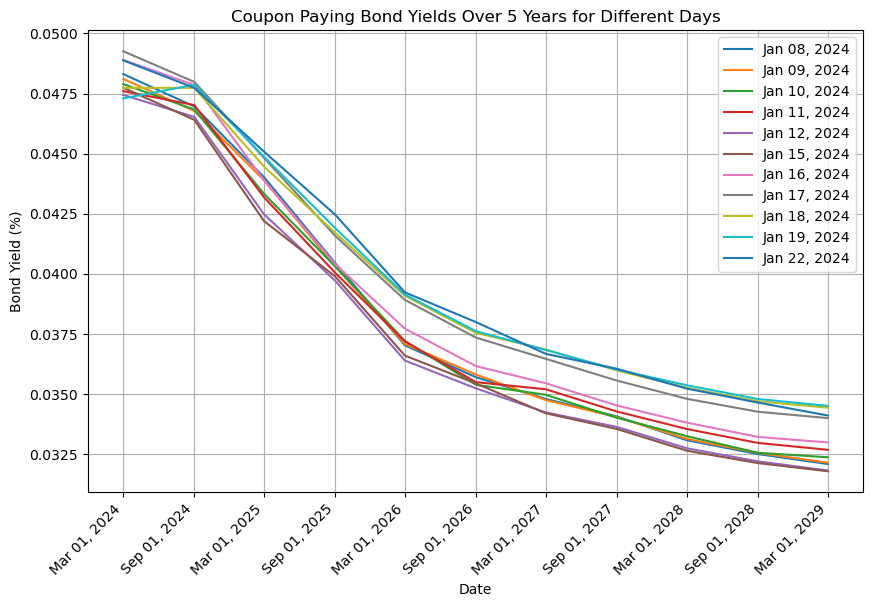

In [18]:
np.random.seed(42)


num_days = 11
num_years = 11


start_date = datetime(2024, 1, 8)

dates = [datetime(2024, 1, 8), datetime(2024, 1, 9), datetime(2024, 1, 10), datetime(2024, 1, 11), 
        datetime(2024, 1, 12), datetime(2024, 1, 15),  datetime(2024, 1, 16),  datetime(2024, 1, 17),
         datetime(2024, 1, 18),  datetime(2024, 1, 19),  datetime(2024, 1, 22)]

dates1 = [datetime(2024, 3, 1), datetime(2024, 9, 1), datetime(2025, 3, 1), datetime(2025, 9, 1), 
        datetime(2026, 3, 1), datetime(2026, 9, 1), datetime(2027, 3, 1), datetime(2027, 9, 1),
        datetime(2028, 3, 1), datetime(2028, 9, 1), datetime(2029, 3, 1)]

bond_yield_lists = [curve08, curve09, curve10, curve11, curve12, curve15, curve16, curve17, curve18, curve19, curve22 ]

bond_yield_data = np.array(bond_yield_lists)
bond_yield_data


plt.figure(figsize=(10, 6))

for i in range(num_days):
    plt.plot(dates1, bond_yield_data[i, :], label=dates[i].strftime('%b %d, %Y'))

plt.title('Coupon Paying Bond Yields Over 5 Years for Different Days')
plt.xlabel('Date')
plt.ylabel('Bond Yield (%)')
plt.legend()

plt.xticks(dates1, [date.strftime('%b %d, %Y') for date in dates1], rotation=45, ha='right')


plt.grid(True)
plt.show()

In [38]:
curvespot_list = [[] for k in range(11)]
l = [52,51,50,49,48,45,44,43,42,41,38]
m = 183
k = [130, 131, 132, 133, 134, 137,138,139,140,141, 144]

for i in range(11):
    curvespot_list[i].append(bond_yield_lists[i][0])
    t = k[i]
    e = 1 + (t/365)*bond_yield_lists[i][1]
    x = -math.log((e - (bond_yield_lists[i][1]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365))) / (1+ (bond_yield_lists[i][1]/2))) / ((l[i]+m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][2]
    x = -math.log((e - (bond_yield_lists[i][2]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][2]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)) 
                  / (1+ (bond_yield_lists[i][2]/2))) / ((l[i]+2*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][3]
    x = -math.log((e - (bond_yield_lists[i][3]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][3]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][3]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) ) / (1+ (bond_yield_lists[i][3]/2))) / ((l[i]+3*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][4]
    x = -math.log((e - (bond_yield_lists[i][4]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][4]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][4]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][4]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)) 
                  / (1+ (bond_yield_lists[i][4]/2))) / ((l[i]+4*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][5]
    x = -math.log((e - (bond_yield_lists[i][5]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][5]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][5]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][5]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)
                  - (bond_yield_lists[i][5]/2) * math.exp(-curvespot_list[i][4] * (l[i]+4*m)/365) ) / (1+ (bond_yield_lists[i][5]/2))) / ((l[i]+5*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][6]
    x = -math.log((e - (bond_yield_lists[i][6]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][6]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][6]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][6]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)
                  - (bond_yield_lists[i][6]/2) * math.exp(-curvespot_list[i][4] * (l[i]+4*m)/365) - (bond_yield_lists[i][6]/2) * math.exp(-curvespot_list[i][5] * (l[i]+5*m)/365)) 
                  / (1+ (bond_yield_lists[i][6]/2))) / ((l[i]+6*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][7]
    x = -math.log((e - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)
                  - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][4] * (l[i]+4*m)/365) - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][5] * (l[i]+5*m)/365)
                  - (bond_yield_lists[i][7]/2) * math.exp(-curvespot_list[i][6] * (l[i]+6*m)/365)) / (1+ (bond_yield_lists[i][7]/2))) / ((l[i]+7*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][8]
    x = -math.log((e - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)
                  - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][4] * (l[i]+4*m)/365) - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][5] * (l[i]+5*m)/365)
                  - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][6] * (l[i]+6*m)/365) - (bond_yield_lists[i][8]/2) * math.exp(-curvespot_list[i][7] * (l[i]+7*m)/365)) 
                  / (1+ (bond_yield_lists[i][8]/2))) / ((l[i]+8*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][9]
    x = -math.log((e - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)
                  - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][4] * (l[i]+4*m)/365) - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][5] * (l[i]+5*m)/365)
                  - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][6] * (l[i]+6*m)/365) - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][7] * (l[i]+7*m)/365)
                  - (bond_yield_lists[i][9]/2) * math.exp(-curvespot_list[i][8] * (l[i]+8*m)/365)) / (1+ (bond_yield_lists[i][9]/2))) / ((l[i]+9*m)/365)
    curvespot_list[i].append(x)
    e = 1 + (t/365)*bond_yield_lists[i][10]
    x = -math.log((e - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][0] * (l[i]/365)) - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][1] * (l[i]+m)/365)
                  - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][2] * (l[i]+2*m)/365) - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][3] * (l[i]+3*m)/365)
                  - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][4] * (l[i]+4*m)/365) - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][5] * (l[i]+5*m)/365)
                  - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][6] * (l[i]+6*m)/365) - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][7] * (l[i]+7*m)/365)
                  - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][8] * (l[i]+8*m)/365) - (bond_yield_lists[i][10]/2) * math.exp(-curvespot_list[i][9] * (l[i]+9*m)/365)) 
                  / (1+ (bond_yield_lists[i][10]/2))) / ((l[i]+10*m)/365)
    curvespot_list[i].append(x)


curvespot_list

[[0.04831173754218129,
  0.04632328849242861,
  0.04339915273463146,
  0.039846675956793705,
  0.036420307783462315,
  0.03510845121134142,
  0.034215361484728694,
  0.033494588756820556,
  0.03248885742395898,
  0.031914693114826864,
  0.031504801555032075],
 [0.04810722537975101,
  0.0461470066101314,
  0.04327909959955014,
  0.03971605530896966,
  0.03647999998415462,
  0.03522322899554035,
  0.034168404766777405,
  0.033468437352599655,
  0.032548219581632544,
  0.03196819333649266,
  0.031562396171810315],
 [0.047894721774694435,
  0.04620441052012599,
  0.04271984203111135,
  0.039719424367791384,
  0.036612098236185636,
  0.034793804417885876,
  0.0344019743045039,
  0.03344399495473288,
  0.032671630484978266,
  0.031972827385622064,
  0.031801134853866014],
 [0.04759960370782767,
  0.046388737468421294,
  0.04257426482421069,
  0.03945574876890567,
  0.036601259501271834,
  0.03490978192071895,
  0.03463753549236561,
  0.03370802962965379,
  0.032973039978895696,
  0.032392092

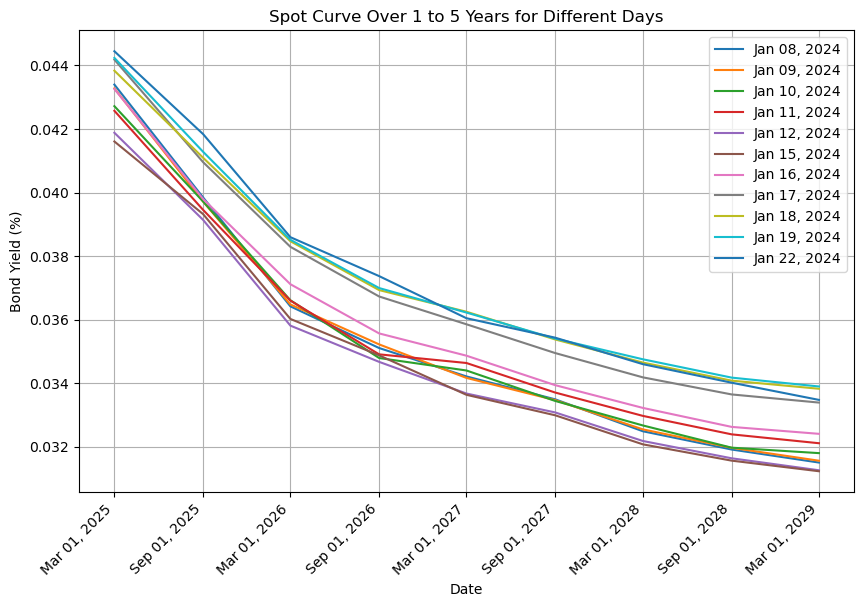

In [39]:
num_days = 11
num_years = 11

start_date = datetime(2024, 1, 8)

dates = [datetime(2024, 1, 8), datetime(2024, 1, 9), datetime(2024, 1, 10), datetime(2024, 1, 11), 
        datetime(2024, 1, 12), datetime(2024, 1, 15),  datetime(2024, 1, 16),  datetime(2024, 1, 17),
         datetime(2024, 1, 18),  datetime(2024, 1, 19),  datetime(2024, 1, 22)]

dates1 = [datetime(2024, 3, 1), datetime(2024, 9, 1), datetime(2025, 3, 1), datetime(2025, 9, 1), 
        datetime(2026, 3, 1), datetime(2026, 9, 1), datetime(2027, 3, 1), datetime(2027, 9, 1),
        datetime(2028, 3, 1), datetime(2028, 9, 1), datetime(2029, 3, 1)]


dates_to_remove = [datetime(2024, 3, 1), datetime(2024, 9, 1)]
filtered_dates1 = [date for date in dates1 if date not in dates_to_remove]

last_9_elements_list = [sublist[-9:] for sublist in curvespot_list]
bond_yield_data = np.array(last_9_elements_list)
bond_yield_data


plt.figure(figsize=(10, 6))
for i in range(num_days):
    plt.plot(filtered_dates1, bond_yield_data[i, :], label=dates[i].strftime('%b %d, %Y'))

plt.title('Spot Curve Over 1 to 5 Years for Different Days')
plt.xlabel('Date')
plt.ylabel('Bond Yield (%)')
plt.legend()

plt.xticks(filtered_dates1, [date.strftime('%b %d, %Y') for date in filtered_dates1], rotation=45, ha='right')
plt.grid(True)
plt.show()


In [40]:
curveforward_list = [[] for k in range(11)]
l = [52,51,50,49,48,45,44,43,42,41,38]
m = 183
for i in range(11):
    x = (curvespot_list[i][4]*((l[i]+4*m)/365) - curvespot_list[i][2]*((l[0]+2*m)/365))/(((l[i]+4*m)/365)-((l[i]+2*m)/365))
    curveforward_list[i].append(x)
    x = (curvespot_list[i][6]*((l[i]+6*m)/365) - curvespot_list[i][4]*((l[0]+4*m)/365))/(((l[i]+6*m)/365)-((l[i]+4*m)/365))
    curveforward_list[i].append(x)
    x = (curvespot_list[i][8]*((l[i]+8*m)/365) - curvespot_list[i][6]*((l[0]+6*m)/365))/(((l[i]+8*m)/365)-((l[i]+6*m)/365))
    curveforward_list[i].append(x)
    x = (curvespot_list[i][10]*((l[i]+10*m)/365) - curvespot_list[i][8]*((l[0]+8*m)/365))/(((l[i]+10*m)/365)-((l[i]+8*m)/365))
    curveforward_list[i].append(x)

curveforward_list


[[0.028449932948520495,
  0.029492197828424983,
  0.02706404958274269,
  0.027428766862974154],
 [0.02861523594257133,
  0.029123434670628456,
  0.02736854421961552,
  0.027392804135028034],
 [0.029436521452712087,
  0.029479730831696544,
  0.02705622432808087,
  0.028021698661314348],
 [0.029479620147467852,
  0.030147174209689178,
  0.027472796917619488,
  0.028286266998878137],
 [0.02848985646720884,
  0.028732038089521766,
  0.02713779582517962,
  0.027105881807141054],
 [0.028956412221367966,
  0.02788052452339046,
  0.02656401320260199,
  0.027129483734414976],
 [0.029287095931787063,
  0.029288140045078674,
  0.027332506606045782,
  0.02832209152268595],
 [0.03062426894314335,
  0.029754979693078925,
  0.028094982518837425,
  0.02928513353964528],
 [0.031288696416157905,
  0.030509625301463585,
  0.028675312943561723,
  0.029489529921120004],
 [0.030821124865045582,
  0.030231212245331606,
  0.029087074506944276,
  0.029337470253536384],
 [0.030437873216072636,
  0.0292065813879

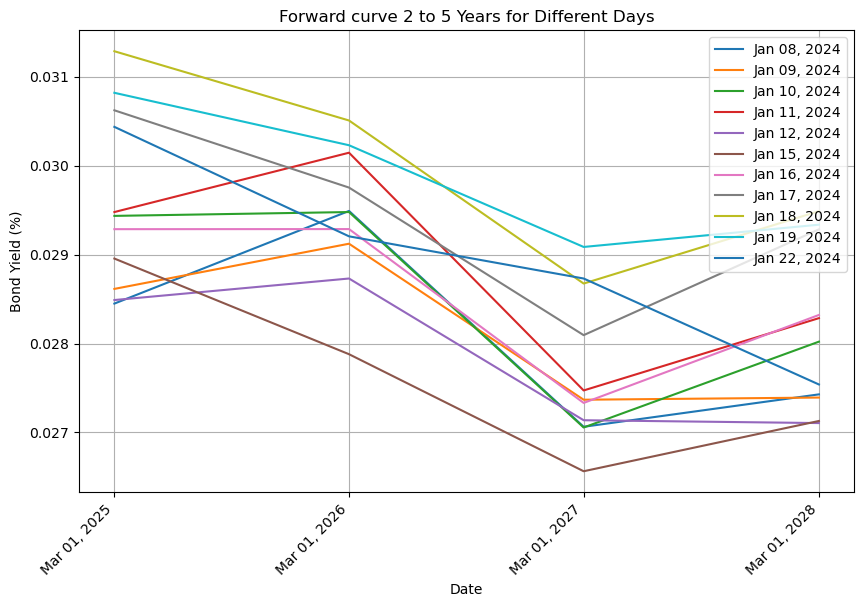

In [41]:
num_days = 11
num_years = 11


dates = [datetime(2024, 1, 8), datetime(2024, 1, 9), datetime(2024, 1, 10), datetime(2024, 1, 11), 
        datetime(2024, 1, 12), datetime(2024, 1, 15),  datetime(2024, 1, 16),  datetime(2024, 1, 17),
         datetime(2024, 1, 18),  datetime(2024, 1, 19),  datetime(2024, 1, 22)]

dates1 = [datetime(2024, 3, 1), datetime(2024, 9, 1), datetime(2025, 3, 1), datetime(2025, 9, 1), 
        datetime(2026, 3, 1), datetime(2026, 9, 1), datetime(2027, 3, 1), datetime(2027, 9, 1),
        datetime(2028, 3, 1), datetime(2028, 9, 1), datetime(2029, 3, 1)]

filtered_dates1 = [datetime(2025, 3, 1), datetime(2026, 3, 1), datetime(2027, 3, 1),datetime(2028, 3, 1)]

bond_yield_data = np.array(curveforward_list)


plt.figure(figsize=(10, 6))
for i in range(num_days):
    plt.plot(filtered_dates1, bond_yield_data[i, :], label=dates[i].strftime('%b %d, %Y'))

plt.title('Forward curve 2 to 5 Years for Different Days')
plt.xlabel('Date')
plt.ylabel('Bond Yield (%)')
plt.legend()

plt.xticks(filtered_dates1, [date.strftime('%b %d, %Y') for date in filtered_dates1], rotation=45, ha='right')
plt.grid(True)
plt.show()


In [62]:
yieldlist = [sublist[:5] for sublist in bond_yield_lists[:10]]
yieldcov = [[] for k in range(5)]
for i in range(5):
    yieldcov[i].append(math.log(yieldlist[1][i]/yieldlist[0][i]))
    yieldcov[i].append(math.log(yieldlist[2][i]/yieldlist[1][i]))
    yieldcov[i].append(math.log(yieldlist[3][i]/yieldlist[2][i]))
    yieldcov[i].append(math.log(yieldlist[4][i]/yieldlist[3][i]))
    yieldcov[i].append(math.log(yieldlist[5][i]/yieldlist[4][i]))
    yieldcov[i].append(math.log(yieldlist[6][i]/yieldlist[5][i]))
    yieldcov[i].append(math.log(yieldlist[7][i]/yieldlist[6][i]))
    yieldcov[i].append(math.log(yieldlist[8][i]/yieldlist[7][i]))
    yieldcov[i].append(math.log(yieldlist[9][i]/yieldlist[8][i]))

yieldcov

[[-0.004242162805565951,
  -0.004427075875578231,
  -0.006180870013201632,
  -0.0032798029901806697,
  0.00627703380382656,
  0.02388401305356875,
  0.007403782763838323,
  -0.03135375339945843,
  -0.00933076191166007],
 [-0.0038847567075039513,
  0.0012122458375835722,
  0.00396502835619349,
  -0.01049862559214688,
  -0.0026912427778680212,
  0.03080169619906509,
  0.0026814737331948097,
  -0.00520432170795226,
  0.002724777665364917],
 [-0.002837471156630599,
  -0.012977306384587549,
  -0.003383821928158884,
  -0.01647829017274888,
  -0.0066229639487181335,
  0.03930930793985316,
  0.021052818034234682,
  -0.008019162752273042,
  0.009098255621736813],
 [-0.0033415110057732327,
  -0.00012253316593278005,
  -0.006617576264636113,
  -0.008275748419438041,
  0.004422933311774637,
  0.012777623479934734,
  0.02867510888620754,
  0.003097913729334985,
  0.004629735159142456],
 [0.0014714181058322635,
  0.003376374247307199,
  -0.00042651208426169705,
  -0.021712672525758783,
  0.005674357

In [71]:
yieldarray = np.array(yieldcov)
covariance_yield = np.cov(yieldarray)
print("Covariance Matrix:")
print(covariance_yield)

Covariance Matrix:
[[2.21395963e-04 1.17816157e-04 1.76167777e-04 7.13623554e-05
  1.27600952e-04]
 [1.17816157e-04 1.37453667e-04 1.83229130e-04 5.67133150e-05
  1.35544284e-04]
 [1.76167777e-04 1.83229130e-04 3.24765941e-04 1.48603881e-04
  2.46849036e-04]
 [7.13623554e-05 5.67133150e-05 1.48603881e-04 1.27694210e-04
  1.60688132e-04]
 [1.27600952e-04 1.35544284e-04 2.46849036e-04 1.60688132e-04
  2.60012763e-04]]


In [66]:
curveforward_list
forwardlist = [sublist[:4] for sublist in curveforward_list[:10]]
forwardcov = [[] for k in range(4)]
for i in range(4):
    forwardcov[i].append(math.log(forwardlist[1][i]/forwardlist[0][i]))
    forwardcov[i].append(math.log(forwardlist[2][i]/forwardlist[1][i]))
    forwardcov[i].append(math.log(forwardlist[3][i]/forwardlist[2][i]))
    forwardcov[i].append(math.log(forwardlist[4][i]/forwardlist[3][i]))
    forwardcov[i].append(math.log(forwardlist[5][i]/forwardlist[4][i]))
    forwardcov[i].append(math.log(forwardlist[6][i]/forwardlist[5][i]))
    forwardcov[i].append(math.log(forwardlist[7][i]/forwardlist[6][i]))
    forwardcov[i].append(math.log(forwardlist[8][i]/forwardlist[7][i]))
    forwardcov[i].append(math.log(forwardlist[9][i]/forwardlist[8][i]))
forwardcov

[[0.005793497491507605,
  0.02829682845985715,
  0.0014630524427771978,
  -0.034151071654325994,
  0.01624356196801858,
  0.011355334669686162,
  0.044645790206846364,
  0.021464098120851927,
  -0.015056568338124826],
 [-0.012582582745228499,
  0.012159771512920999,
  0.022388257652384648,
  -0.04807838449777059,
  -0.03008441057127158,
  0.049254258137048895,
  0.015813845165323737,
  0.025045714856161267,
  -0.009167308755785444],
 [0.011188069199054435,
  -0.011477249358388055,
  0.015279228720071633,
  -0.012268875973785228,
  -0.021370023429498997,
  0.02851929932903299,
  0.027514290329379524,
  0.020445574071414997,
  0.014257324064166868],
 [-0.001311992066263665,
  0.022698806151176754,
  0.009397259568093607,
  -0.04262567662308009,
  0.0008703519752525402,
  0.04302102213583049,
  0.03343788023220209,
  0.006955282886469188,
  -0.005169735182697712]]

In [72]:
forwardarray = np.array(forwardcov)
covariance_forward = np.cov(forwardarray)
print("Covariance Matrix Forward Curve:")
print(covariance_forward)

Covariance Matrix Forward Curve:
[[0.00054551 0.00039725 0.00012118 0.00046605]
 [0.00039725 0.00091792 0.00041468 0.00065131]
 [0.00012118 0.00041468 0.00033898 0.00025617]
 [0.00046605 0.00065131 0.00025617 0.00062052]]


In [73]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_yield)
print("Eigenvalues Yield Curve:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues Yield Curve:
[4.25172683e-06 2.61599576e-05 6.92399921e-05 1.39204101e-04
 8.32466766e-04]

Eigenvectors:
[[ 0.055993    0.02284475 -0.54166704 -0.74436282 -0.38582861]
 [-0.58639384  0.41810892  0.5455354  -0.2465091  -0.35064453]
 [ 0.28726254 -0.62273841  0.40698789  0.01892064 -0.60305885]
 [-0.63702929 -0.28326205 -0.46717455  0.4451986  -0.31225383]
 [ 0.40580903  0.59717881 -0.15841955  0.4319693  -0.51672263]]


In [74]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_forward)
print("Eigenvalues Forward Curve:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues Forward Curve:
[4.25207195e-05 1.07052562e-04 3.79795631e-04 1.89355408e-03]

Eigenvectors:
[[ 0.37875635 -0.39686738 -0.72747937 -0.41208455]
 [ 0.47880079  0.41970567  0.39533801 -0.66204593]
 [-0.15308784 -0.78608608  0.51868896 -0.29932349]
 [-0.77708271  0.22002752 -0.21317454 -0.54980629]]
